# Goals of this project

The goal of this project is to answer the following questions:
1. How does the number of houses built change over the years?
2. What year(s) had the most number of houses built?
3. How do the distributions of different continuous variables look like?
4. What can we infer from those distributions?
5. What is the most common size for houses?
6. What choices of house are the most common?
7. How does the preference of those choices change over time?
8. What machine learning models can be used to predict the sale price from the given dataset?

# Data Description

The dataset can be found at https://www.geeksforgeeks.org/machine-learning/house-price-prediction-using-machine-learning-in-python/

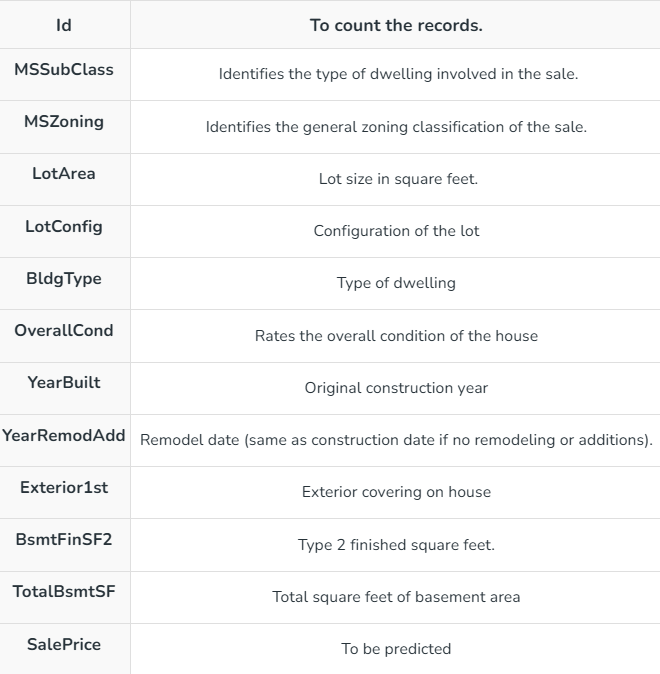

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import numpy as np
from scipy.stats import f_oneway
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Data Cleaning and Preprocessing

In [2]:
df = pd.read_csv('HousePricePrediction.csv')

df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
#Identity datatypes of the columns
obj = (df.dtypes == 'object')
obj_cols = list(obj[obj].index)

num = df.dtypes.astype(str).str.contains('int')
num_cols = list(num[num].index)

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)

print('Number of categorical variables:', len(obj_cols))
print('Number of integer variables:', len(num_cols))
print('Number of float variables:', len(fl_cols))


Number of categorical variables: 4
Number of integer variables: 6
Number of float variables: 3


In [4]:
#Drop any null values
df = df.dropna()
df.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# Exploratory Data Analysis (EDA)

## Continuous Variables Analysis

In [5]:
#Describe the data for the integer variables
num_fl_cols = num_cols + fl_cols
num_fl = df[num_fl_cols]
num_fl.drop('Id', axis= 1).describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,5.575342,1971.267808,1984.865753,46.549315,1057.429452,180921.195890
std,42.300571,9981.264932,1.112799,30.202904,20.645407,161.319273,438.705324,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,795.750000,129975.000000
50%,50.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,991.500000,163000.000000
75%,70.000000,11601.500000,6.000000,2000.000000,2004.000000,0.000000,1298.250000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1474.000000,6110.000000,755000.000000


Above is a summary for the descriptive statistics for the continuous variables. 

### 1 & 2. The number of houses built changed over the years. The year with the most houses built.

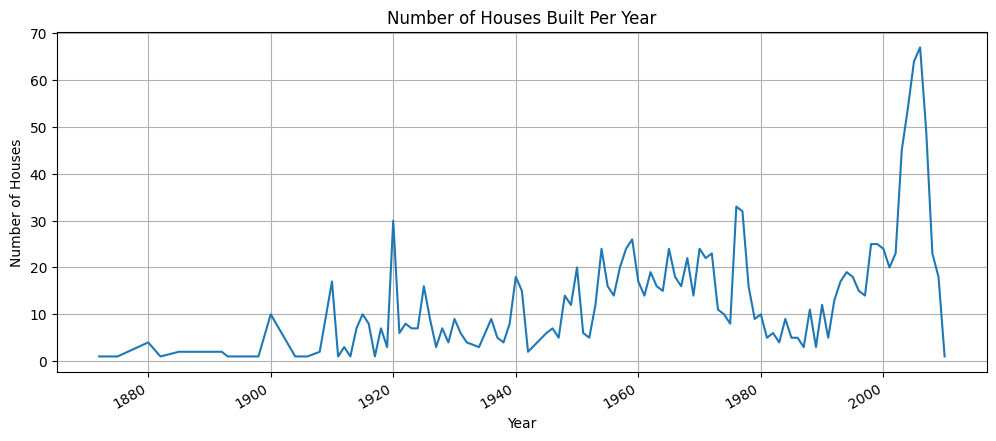

The year with the most number of houses built was 2006 with 67 houses.


In [6]:
# Count number of houses built per year
year_counts = num_fl['YearBuilt'].value_counts().sort_index()

# Convert to time series by turning index into datetime
year_ts = pd.Series(year_counts.values, index=pd.to_datetime(year_counts.index, format='%Y'))

#Plot the time series of the number of houses built per year
year_ts.plot(figsize=(12, 5), title='Number of Houses Built Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()


#The year with the most number of houses built
most_house_year = num_fl['YearBuilt'].value_counts().idxmax()
most_house_value = num_fl['YearBuilt'].value_counts().max()

print(f"The year with the most number of houses built was {most_house_year} with {most_house_value} houses.")

From the beginning to 1980, the number of houses built fluctuated between 0 and 30 houses. The number of houses buils then experienced a slight dip in 1990, which was followed by a significant rise during the early 2000s.

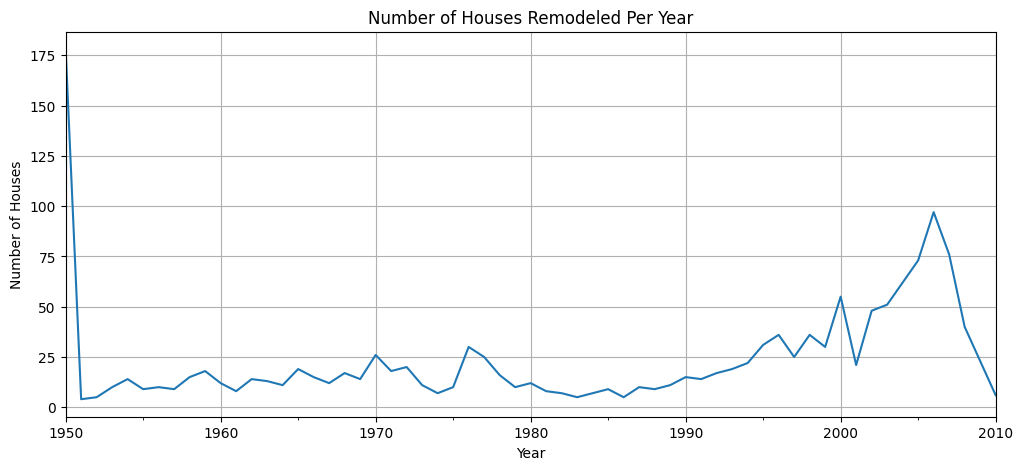

The year with the most number of houses remodeled was 1950 with 178 houses.


In [7]:
# Count number of houses built per year
year_counts = num_fl['YearRemodAdd'].value_counts().sort_index()

# Convert to time series by turning index into datetime
year_ts = pd.Series(year_counts.values, index=pd.to_datetime(year_counts.index, format='%Y'))

#Plot the time series of the number of houses built per year
year_ts.plot(figsize=(12, 5), title='Number of Houses Remodeled Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()


#The year with the most number of houses built
most_house_year = num_fl['YearRemodAdd'].value_counts().idxmax()
most_house_value = num_fl['YearRemodAdd'].value_counts().max()

print(f"The year with the most number of houses remodeled was {most_house_year} with {most_house_value} houses.")

In the first 2-3 years, the number of houses remodeled drastically decreased by over 150 houses from the 178 houses at the beginning. The number of remodeled houses experienced minimal change for the next 50 years, which followed by a small peak in 2006.

### 3. Distribution of continuous variables.

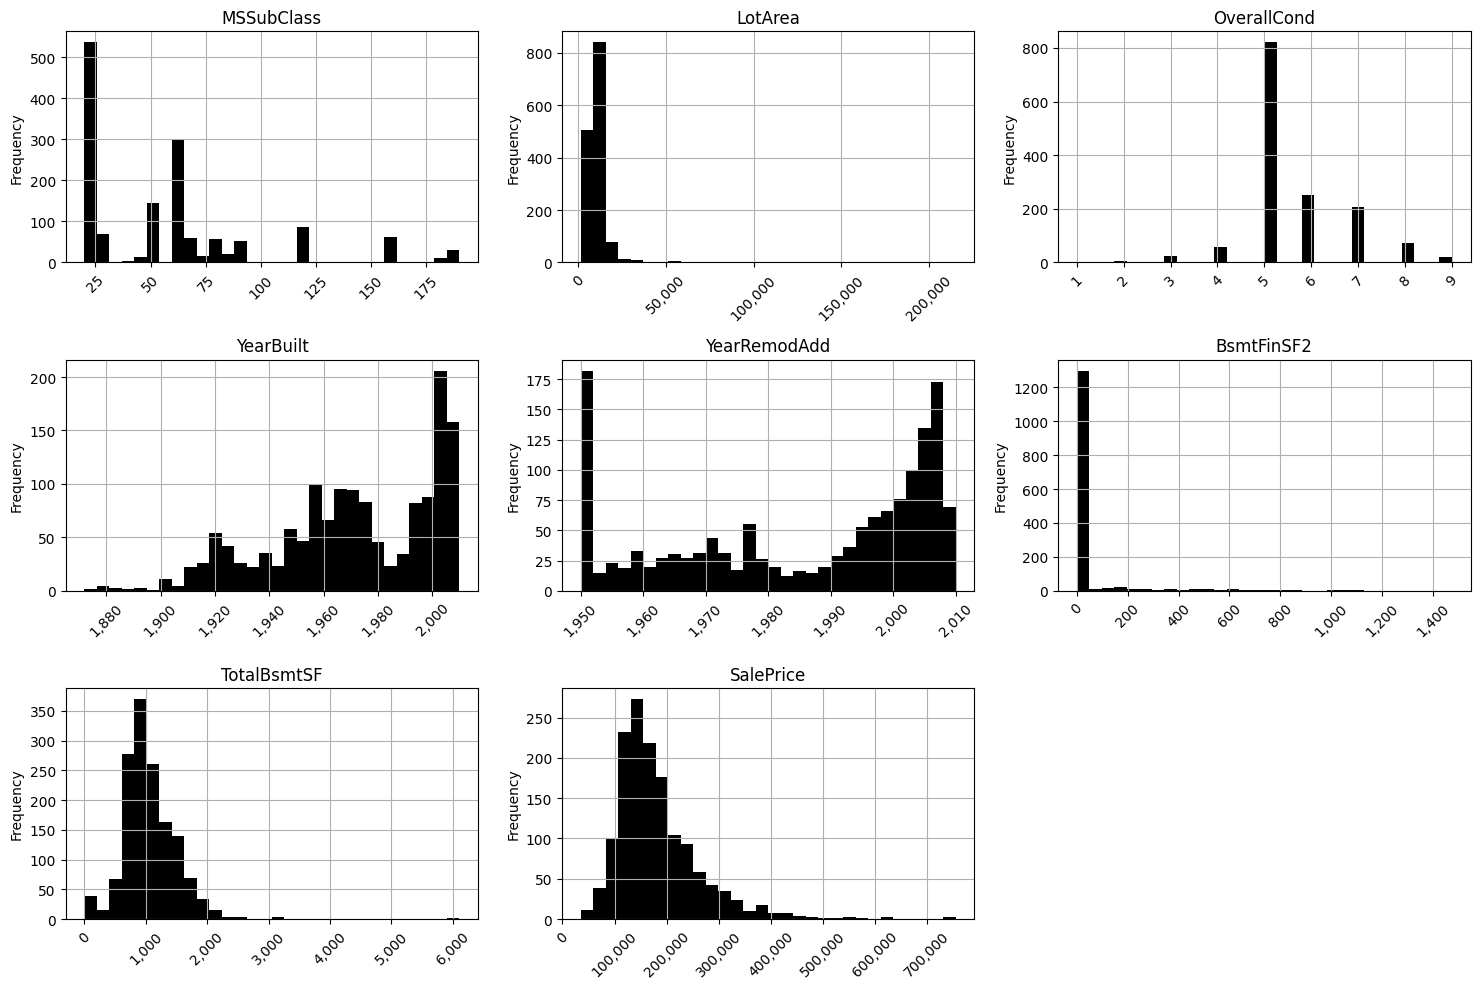

In [8]:
#Distribution of each integer variables
axes = num_fl.drop('Id', axis=1).hist(
    color="k",
    bins=30,
    figsize=(15, 10)
)

#Label each plot
for ax in axes.ravel():
    ax.set_ylabel("Frequency")
    ax.set_title(ax.get_title())  # This keeps the feature name as title
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
plt.tight_layout()
plt.show()

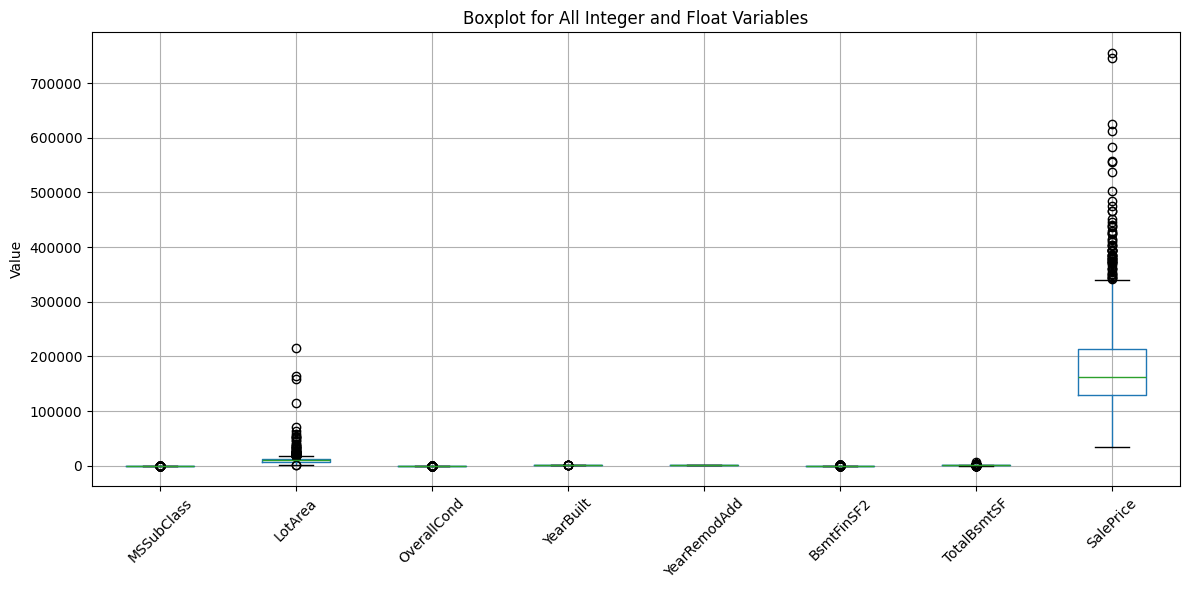

In [9]:
num_fl.drop('Id', axis=1).boxplot(figsize=(12, 6))
plt.title("Boxplot for All Integer and Float Variables")
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.tight_layout()
plt.show()

### 4. Statistical inferences from SalePrice distribution

According to the Central Limit Theorem, if the sample size from a population is large (typically greater than 30), then the distribution of that sample is assumed to the approximately normal. 

In [10]:
print('The sample size of SalePrice is:', len(df['SalePrice']))

The sample size of SalePrice is: 1460


The sample size of SalePrice is 2919, which is larger than 30, so it can be assumed to be normally distributed. Since the distribution for SalePrice is normal, we can calculate the confidence interval to estimate the population mean of sale prices.

In [11]:
#Calculate confidence interval
confidence_interval = stats.t.interval(
    confidence=0.95,
    df=len(df['SalePrice']) - 1,  # Degrees of freedom
    loc=np.mean(df['SalePrice']),  # Sample mean
    scale=stats.sem(df['SalePrice'])  # Standard error of the mean
)

print(f"Confidence Interval (95%): {confidence_interval}")


Confidence Interval (95%): (176842.84104108496, 184999.55073973694)


### 4. Statistical inferences from TotalBsmtSF	distribution

In [12]:
print('The sample size for TotalBsmtSF is:', len(df['TotalBsmtSF']))

The sample size for TotalBsmtSF is: 1460


The sample size of TotalBsmtSF is 1460, which is larger than 30, so it can be assumed to be normally distributed (Central Limit Theorem).Since the distribution for TotalBsmtSF (total square feet of basement area) is normal, we can calculate the confidence interval to estimate the population mean of total basement area.

In [13]:
#Calculate confidence interval
confidence_interval2 = stats.t.interval(
    confidence=0.95,
    df=len(df['TotalBsmtSF']) - 1,  # Degrees of freedom
    loc=np.mean(df['TotalBsmtSF']),  # Sample mean
    scale=stats.sem(df['TotalBsmtSF'])  # Standard error of the mean
)

print(f"Confidence Interval (95%): {confidence_interval2}")


Confidence Interval (95%): (1034.9075535432128, 1079.951350566376)


### 4. Statistical inferences from LotArea distribution

In [14]:
print('The sample size of LotArea is:', len(df['LotArea']))

The sample size of LotArea is: 1460


The sample size of LotArea is 1460, which is larger than 30, so it can be assumed to be normally distributed (Central Limit Theorem). Since the distribution for LotArea is normal, we can calculate the confidence interval to estimate the population mean of lot sizes.

In [15]:
#Calculate confidence interval
confidence_interval3 = stats.t.interval(
    confidence=0.95,
    df=len(df['LotArea']) - 1,  # Degrees of freedom
    loc=np.mean(df['LotArea']),  # Sample mean
    scale=stats.sem(df['LotArea'])  # Standard error of the mean
)

print(f"Confidence Interval (95%): {confidence_interval3}")


Confidence Interval (95%): (10004.417989833715, 11029.238174549848)


It is estimated that it is 95% certain that the population mean of lot area is approximately between 10004 and 11029 squared feet.

### 5. The most common size for houses

From the confidence interval of TotalBsmtSF and LotArea, on average, the size of a basement is about 1035 and 1080 squared feet, while the size of the lot area is about 10004 and 11029 squared feet.

## Categorical Variables Analysis

In [16]:
categorical_df = df[obj_cols]
categorical_df

,MSZoning,LotConfig,BldgType,Exterior1st
0,RL,Inside,1Fam,VinylSd
1,RL,FR2,1Fam,MetalSd
2,RL,Inside,1Fam,VinylSd
3,RL,Corner,1Fam,Wd Sdng
4,RL,FR2,1Fam,VinylSd
...,...,...,...,...
1455,RL,Inside,1Fam,VinylSd
1456,RL,Inside,1Fam,Plywood
1457,RL,Inside,1Fam,CemntBd
1458,RL,Inside,1Fam,MetalSd


### 6. The most common house choices.

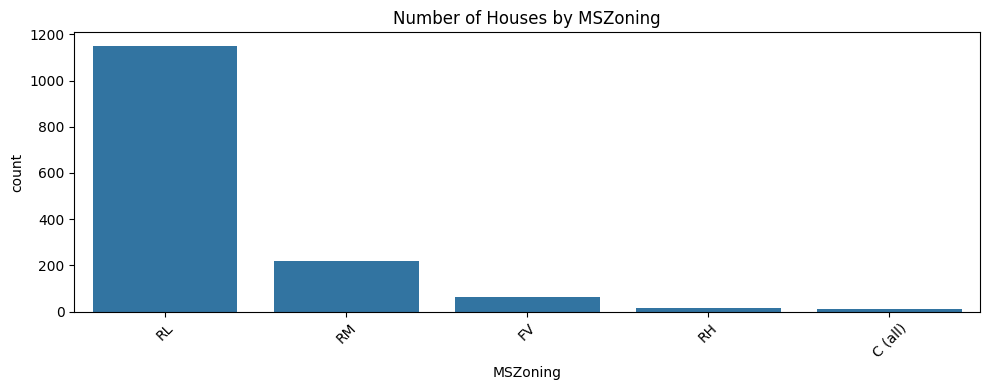

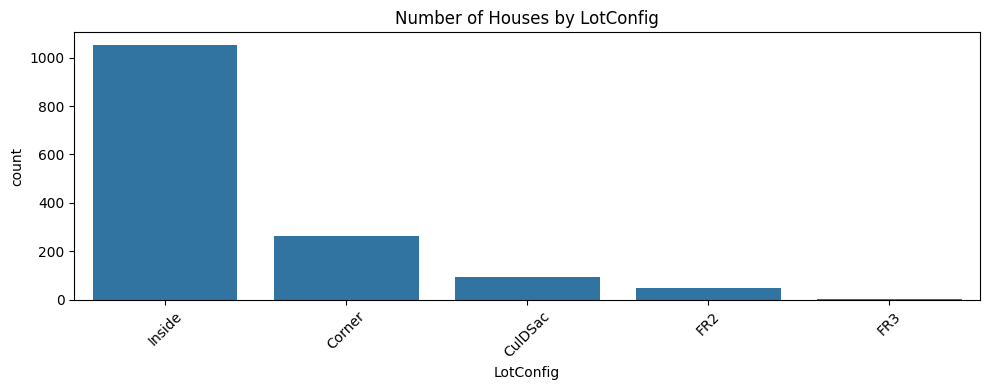

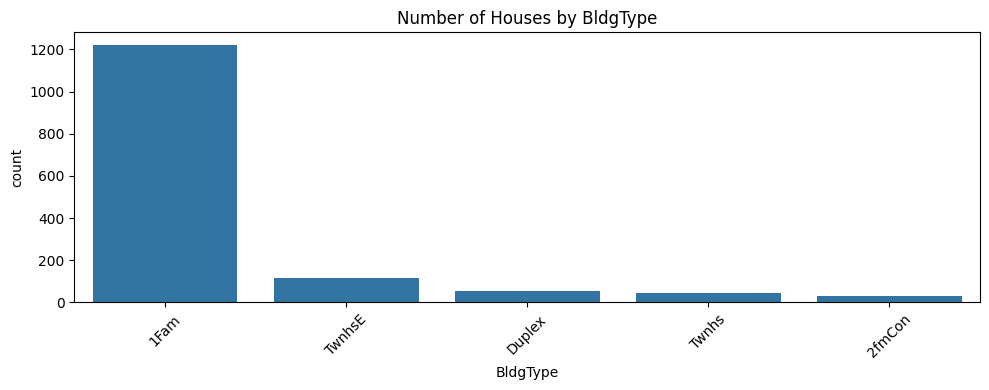

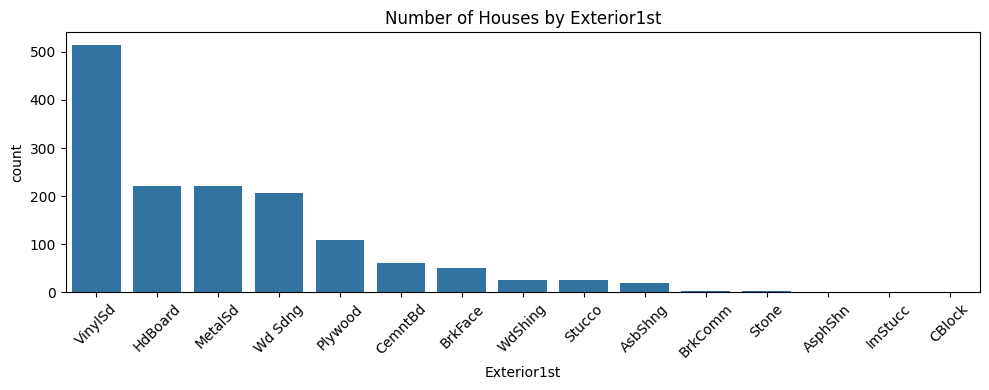

In [17]:
categorical_cols = categorical_df.columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Number of Houses by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

From the bar charts, the most common choices for MSZoning (general zoning classification), LotConfig (configuration of the lot), BldgType (type of dwelling), and Exterior1st (exterior covering on house) were RL (Low-Rise Residential), Inside, 1Fam, and Vinylsd, respectively.

### 7. How those house choices change over the years.

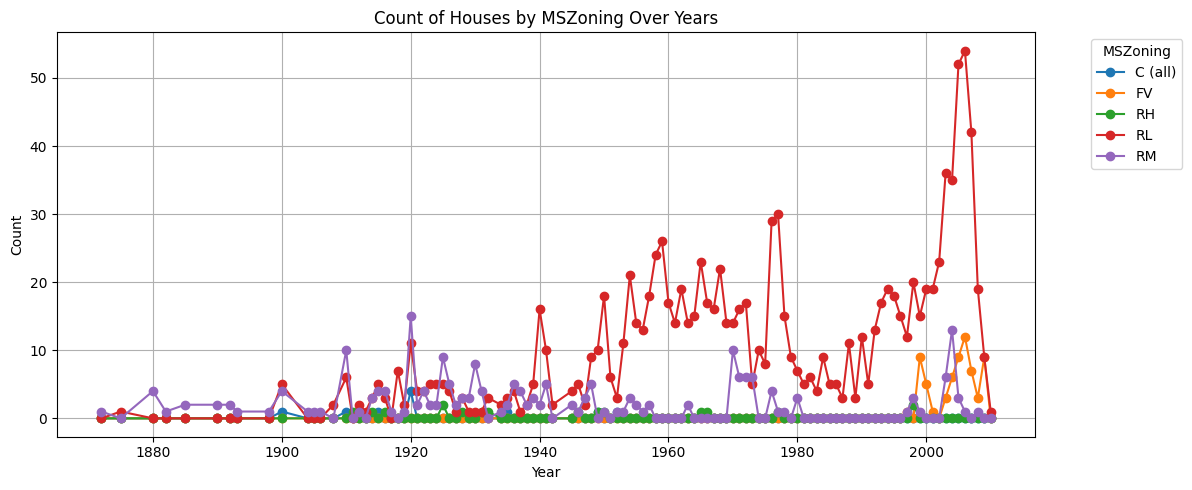

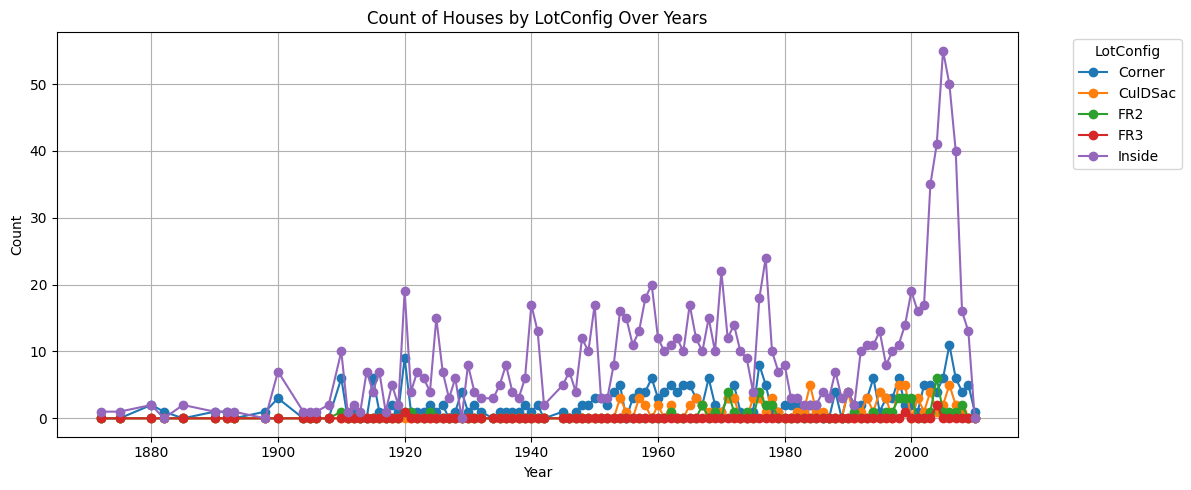

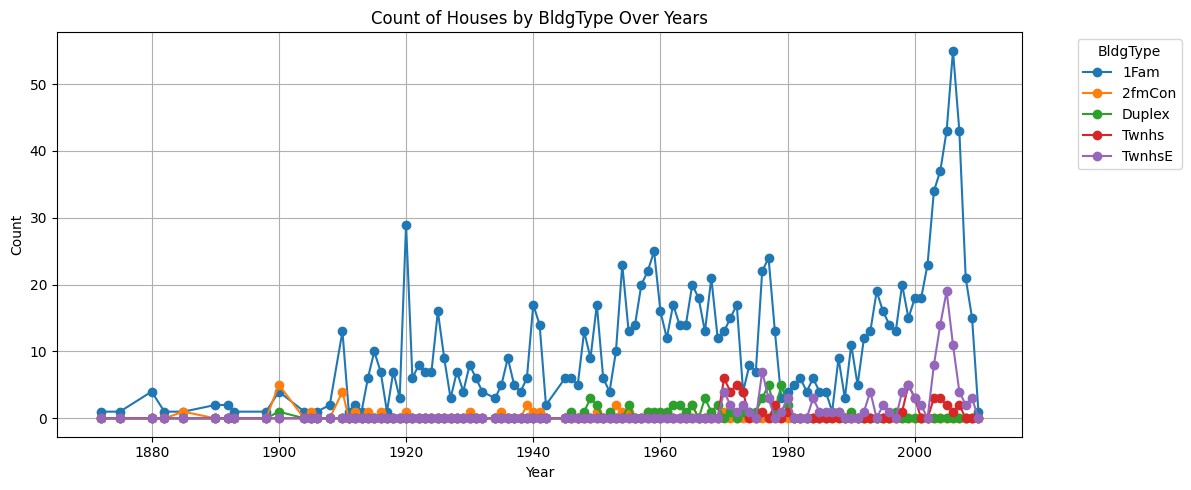

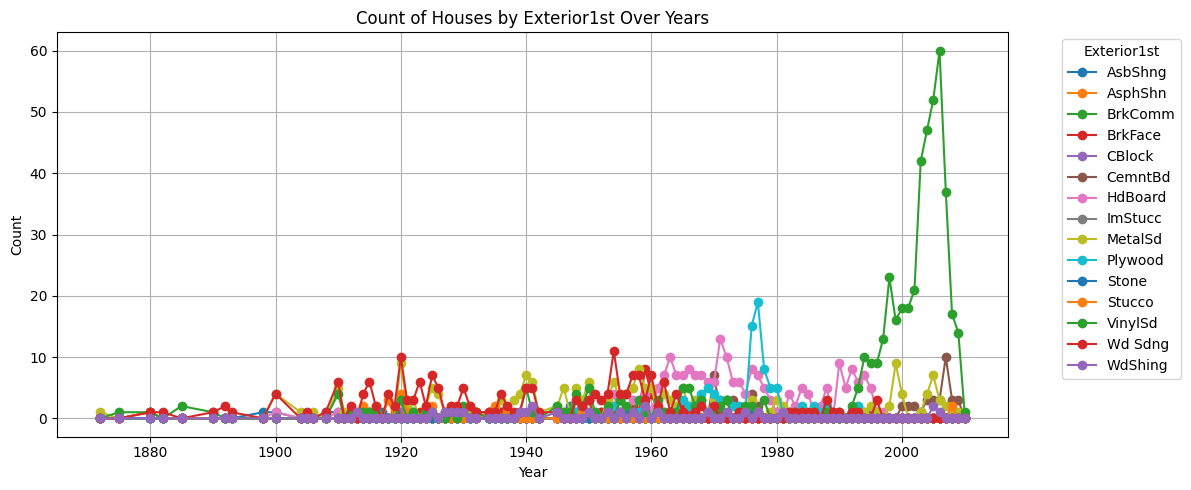

In [18]:
#Choices preference for each category over the years
for col in categorical_cols:
    # Group by year and category, count occurrences
    grouped = df.groupby(['YearBuilt', col]).size().unstack(fill_value=0)

    # Skip columns with too many categories (optional)
    if grouped.shape[1] > 20:
        print(f"Skipping '{col}' (too many categories: {grouped.shape[1]})")
        continue

    # Step 3: Plot
    grouped.plot(figsize=(12, 5), marker='o')
    plt.title(f'Count of Houses by {col} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Machine Learning Models to Predict SalePrice

## Feature Selection

### Integer Variable as Input Features

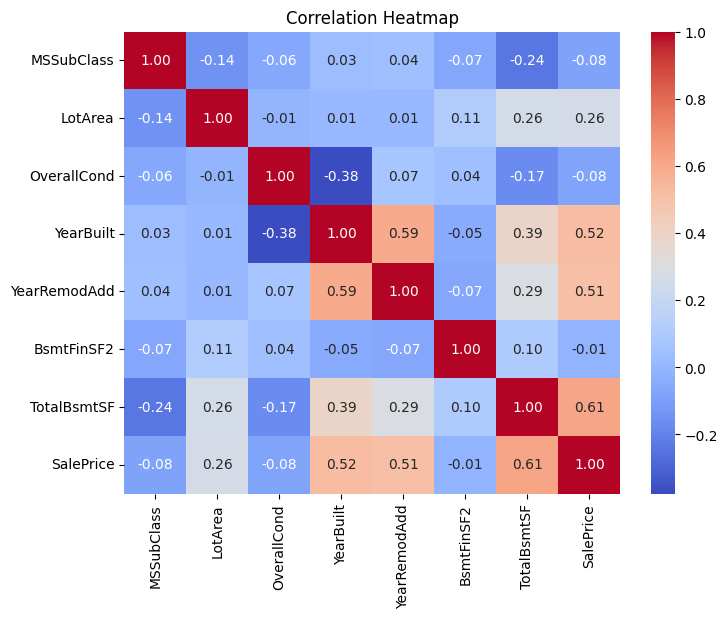

In [19]:
#Plot a heatmap for the correlation matrix
corr_matrix = num_fl.drop('Id',axis= 1).corr()
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the heatmap, the most correlated integer variables are year built, year remodeled, and total basement area. However, the year built and year remodeled are time variables, so they might not be the best to be used for sale price prediction. We may only need total basement area for integer variable for the input features.

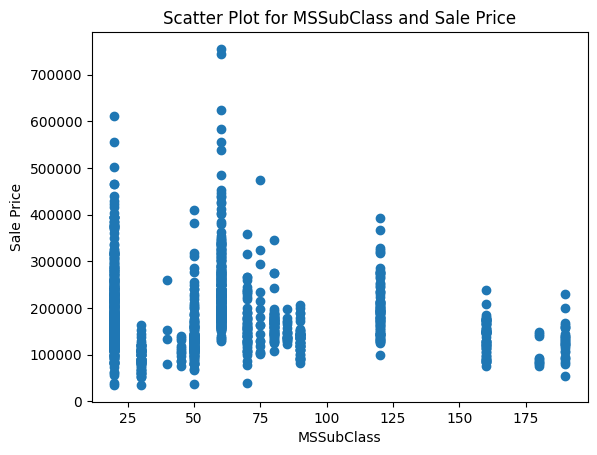

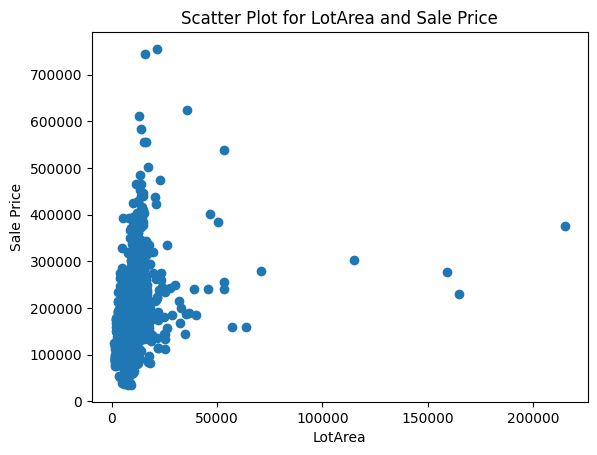

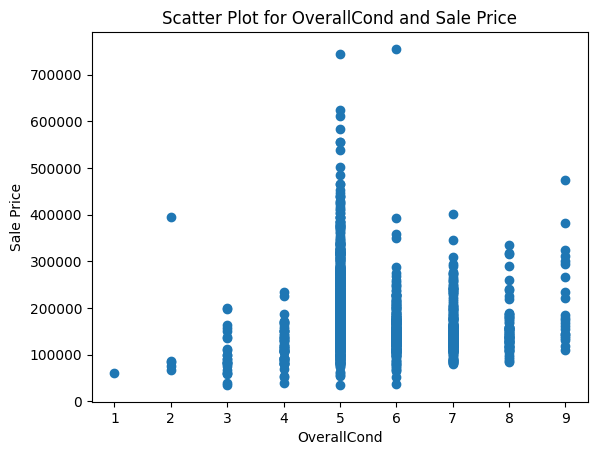

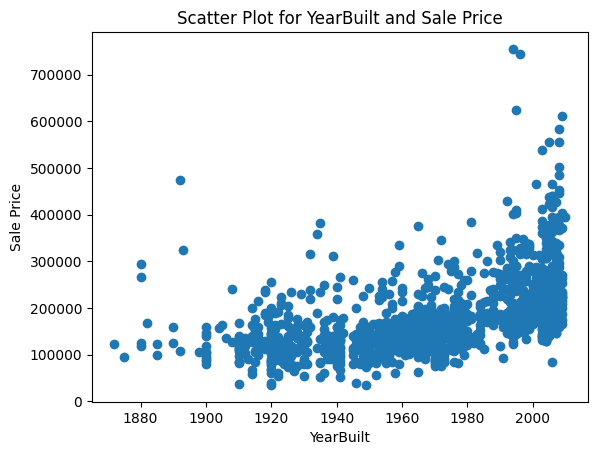

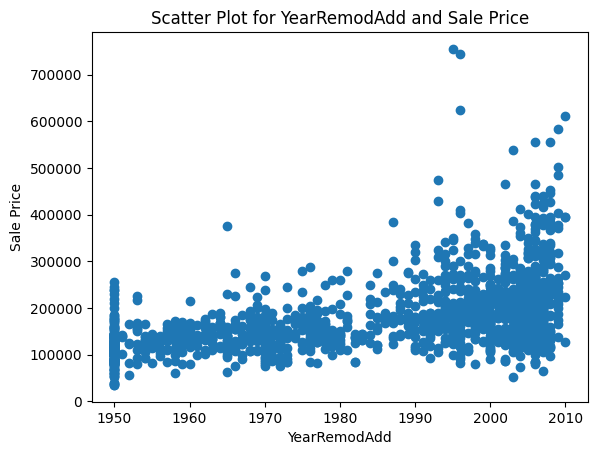

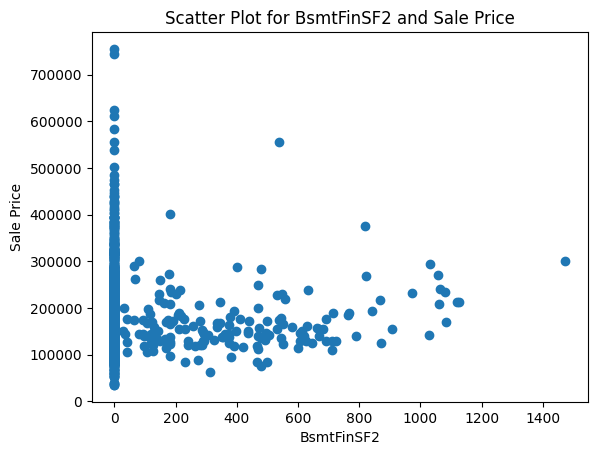

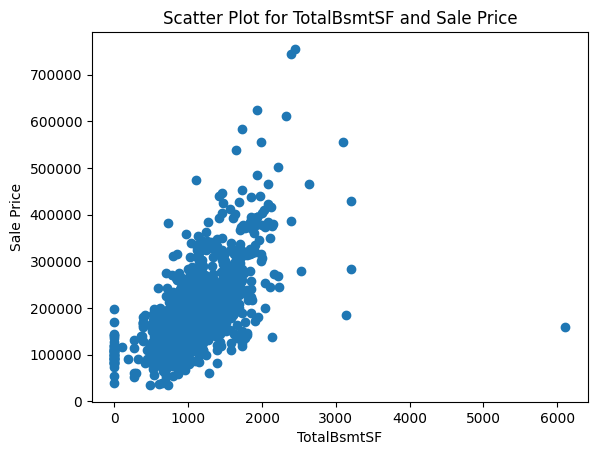

In [20]:
#PLot scatter plot for total basement area and sale price
for i in range(1, len(num_fl_cols)-1):
    plt.scatter(num_fl[num_fl_cols[i]], num_fl['SalePrice'])
    
    plt.xlabel(num_fl_cols[i])
    plt.ylabel("Sale Price")
    plt.title(f"Scatter Plot for {num_fl_cols[i]} and Sale Price")
    
    # Display the plot
    plt.show()

From the scatter plot, it can be seen that as the total basement area increases, the sale price for the house tends to increase.

### Categorical Variables as Input Features

C:\Users\binhh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


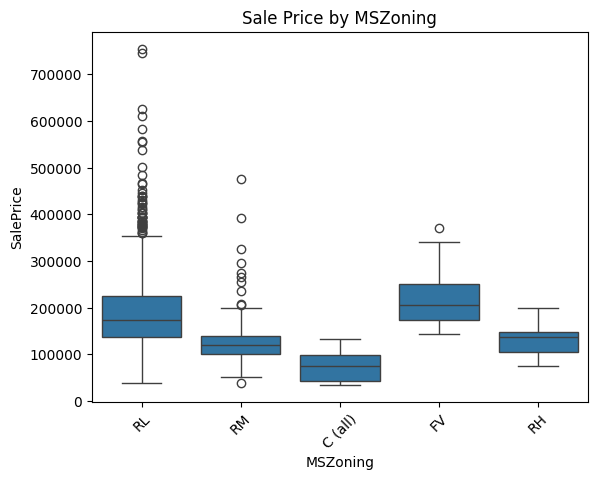

C:\Users\binhh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


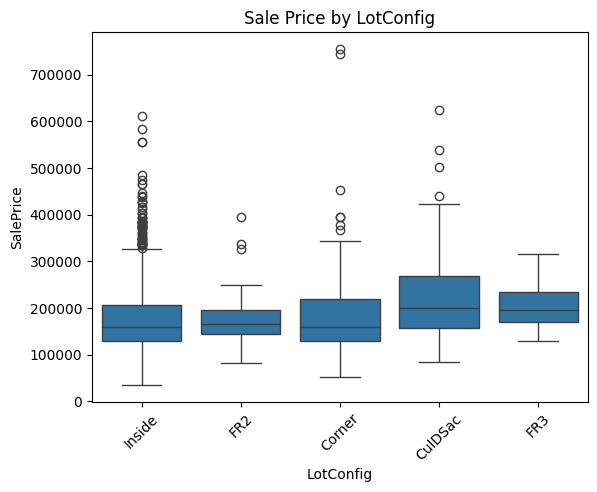

C:\Users\binhh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


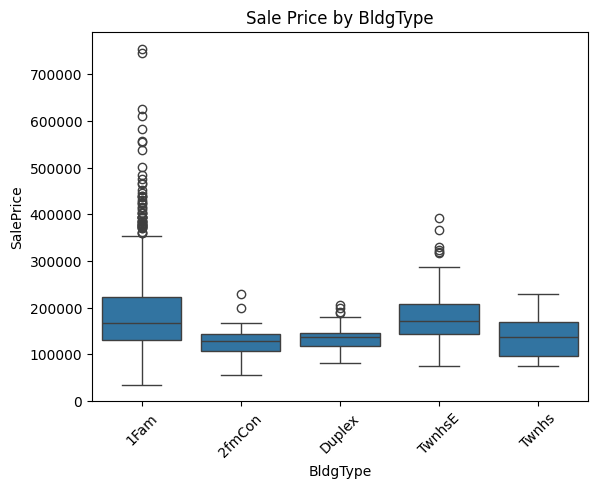

C:\Users\binhh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


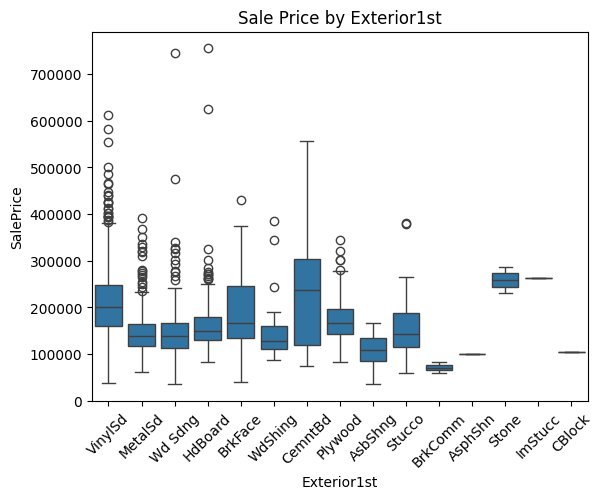

In [21]:
#Plot boxplot for each categorical columns corresponding to the sale price
for col in categorical_cols:
    sns.boxplot(data=df, x= col, y='SalePrice')
    plt.title(f'Sale Price by {col}')
    plt.xticks(rotation=45)
    plt.show()

From the box plots, it can be seen that choices in each categorical columns have different distributions of the sale price. This might indicate that those choices in the categorical columns are associated/correlated with the sale price. But to statistically prove that, an ANOVA test is performed for each category. 

In [22]:
#Define target
target = 'SalePrice'

# Store ANOVA results
anova_results = {}

for col in categorical_cols:
    groups = [group[target].dropna().values for name, group in df.groupby(col)]
    
    # Only perform ANOVA if there are at least 2 groups with more than 1 value
    if len(groups) >= 2 and all(len(g) > 1 for g in groups):
        f_stat, p_val = f_oneway(*groups)
        anova_results[col] = {'F': f_stat, 'p-value': p_val}
    else:
        anova_results[col] = {'F': None, 'p-value': None}

# Convert results to DataFrame
anova_df = pd.DataFrame(anova_results).T.sort_values('p-value')

# Display results
print(anova_df)

                     F   p-value
MSZoning     43.840282       0.0
BldgType     13.011077       0.0
LotConfig     7.809954  0.000003
Exterior1st       None      None


From the results, the differences in MSZoning, BldgType, and LotConfig choices are statistically significant (p-value < 0.05) to the differences in sale price. Since MsZoning has the largest F-statistics, meaning MSZoning and SalePrice means differ most significantly, there is to a greater "correlation" between MsZoning and SalePrice.

## Feature Engineering and Preprocessing

### One-hot encoding categorical variables

In [23]:
# Strip whitespace 
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.str.strip())

# Create the encoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # use sparse=True for memory savings

# Fit and transform
encoded_array = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

# Combine with original df (drop old categorical columns)
df_encoded = df.drop(columns=categorical_cols).join(encoded_df)

This one-hot encoding technique will encode the categorical values of the categorical variables into 0's and 1's. This technique helps with regression models, because only numerical values are fitted in those models. 

In [24]:
df_encoded.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

### Splitting the dataset into Training and Testing

In [25]:
mszoning_cols = [col for col in df_encoded.columns if col.startswith('MSZoning_')]
X = df_encoded[['TotalBsmtSF'] + mszoning_cols]
y= df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

The whole dataset is splitted into 80% training set and 20% testing set.

### 8. Machine learning models to predict SalePrice.

#### Support Vector Regression (SVR)

In [27]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_pred_SVR = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred_SVR))

0.3007268786026028


The result shows that on average, the predicted value by the SVR model is about 30% off from the true value

#### Random Forest Regression

##### Hyperparameters tuning with GridSearchCV

In [28]:
#Hyperparameter tuning
param_grid = {
    'n_estimators': [5, 50],
    'max_depth': [None, 2, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 10],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 5}
Best Estimator: RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=5)


In [29]:
model_RFR = RandomForestRegressor(n_estimators=50, max_depth=20, min_samples_leaf=10, min_samples_split=2)
model_RFR.fit(X_train, y_train)
y_pred_RFR = model_RFR.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred_RFR)

0.2248562182439897

The result shows that on average, the predicted value by the Random Forest Regression (hyperparameters tuned) model is about 22.49% off from the true value

#### Linear Regression

In [32]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred_LR))

0.2668060092463268


The result shows that on average, the predicted value by the Linear Regression model is about 26.7% off from the true value

Of the three models, Random Forest Regression shows the least error, meaning it is the best of the three.

# Conclusion

In this project, I explored a housing price dataset, starting with the exploratory data analysis on the variables and ending with the evaluation of different machine learning models to predict the sale price of a house. 

For the exploratory data analysis section, it was found that the year with the most houses built was 2006, at 67 houses. Whilst, the year with the most houses remodeled was 1950, at 178 houses. Moreover, it was estimated with 95% certainty that the population mean of sale prices, total basement area, and lot area are approximately between 176843 and 185000, 1035 and 1080, and 10004 and 11029, respectively. Further analysis showed that the most common choices for general zoning classification, configuration of the lot, type of dwelling, and exterior covering on house were RL (Low-Rise Residential), Inside, 1Fam, and Vinylsd, respectively.

In feature selection, it was found that total basement area is the most correlated variable to the sale price, at r=0.61. Alongside that, from the ANOVA test, the general zoning classification is the most relevant feature among the categorical variables for sale price prediction. For the machine learning models use to predict the sale price, support vector regression, random forest regression, and linear regression were chosen. In evaluation, the random forest regression achieved the lowest mean absolute percentage error (22.67%), making it the best model among the three.